# Introduction to Data Visualization and Exploration
# Assignment 1

## Group Members:
#### Khanyisile Sixhaxa: 1590202
#### Tsireledzo Ravelle: 1821249
#### Keletso Pule:
#### Charlotte Savage: 1079415

## Question 1.1.3

In [55]:
import pandas as pd
import numpy as np
import seaborn as sns
import math
from sklearn.preprocessing import OneHotEncoder
import warnings
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

## Read in df, check shape and drop zero rows

In [57]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.shape

(7043, 21)

In [58]:
df_filtered = df[df['TotalCharges'] != " "]

In [59]:
df_filtered.shape

(7032, 21)

In [60]:
#df_filtered.dtypes

In [61]:
df_filtered["TotalCharges"] = pd.to_numeric(df_filtered["TotalCharges"])

In [62]:
df_filtered.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [63]:
df_filtered.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Question 1.1.3.1: 
Convert categorical to dummy

In [64]:
df_filtered.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [65]:
columns_to_dummy = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']

In [66]:
len(columns_to_dummy)

16

### Method: using sklearn LabelEncoder and OneHotEncoder

In [67]:
encoded_list = []
for feature in columns_to_dummy:
     encoded_list.append(feature + '_encoded')

In [68]:
def encode_it_all(df):
    # print(len(df[df.Embarked.isnull()]))
    for feature in ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
        'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity','OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod']:
        # print(df[feature])
        df[feature + '_encoded'] = LabelEncoder().fit_transform(df[feature])

    # one-hot encoding
    all_encodings = []
    encoded_features = []
    for feature in encoded_list:
        # print(feature)
        X = OneHotEncoder().fit_transform(df[feature].values.reshape(-1, 1)).toarray()
        cols = [feature + '_' + str(i) for i in range(0, df[feature].nunique())]
        encoded_features += cols
        tmp_df = pd.DataFrame(X, columns=cols)
        tmp_df.index = df.index
        all_encodings.append(tmp_df)

    # then let's create a new df with all of these new variables
    return pd.concat([df, *all_encodings], axis=1), encoded_features

In [69]:
df2, encoded_features = encode_it_all(df_filtered)

In [70]:
df2.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'gender_encoded', 'SeniorCitizen_encoded', 'Partner_encoded',
       'Dependents_encoded', 'PhoneService_encoded', 'MultipleLines_encoded',
       'InternetService_encoded', 'OnlineSecurity_encoded',
       'OnlineBackup_encoded', 'DeviceProtection_encoded',
       'TechSupport_encoded', 'StreamingTV_encoded', 'StreamingMovies_encoded',
       'Contract_encoded', 'PaperlessBilling_encoded', 'PaymentMethod_encoded',
       'gender_encoded_0', 'gender_encoded_1', 'SeniorCitizen_encoded_0',
       'SeniorCitizen_encoded_1', 'Partner_encoded_0', 'Partner_encoded_1',
       'Dependents_encoded_0', 'Dependents_encoded_1',
       'Pho

## Question 1.1.3.2:
Plot features and distribution of target variable

In [71]:
def plot_distribution(dataset, cols=5, width=20, height=15, hspace=0.2, wspace=0.5):
    plt.style.use('seaborn-whitegrid')
    fig = plt.figure(figsize=(width,height))
    fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=wspace, hspace=hspace)
    rows = math.ceil(float(dataset.shape[1]) / cols)
    for i, column in enumerate(dataset.columns):
        ax = fig.add_subplot(rows, cols, i + 1)
        ax.set_title(column)
        if dataset.dtypes[column] == np.object:
            g = sns.countplot(y=column, data=dataset)
            substrings = [s.get_text()[:18] for s in g.get_yticklabels()]
            g.set(yticklabels=substrings)
            plt.xticks(rotation=25)
        else:
            g = sns.distplot(dataset[column])
            plt.xticks(rotation=25)

In [72]:
columns_to_plot = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']

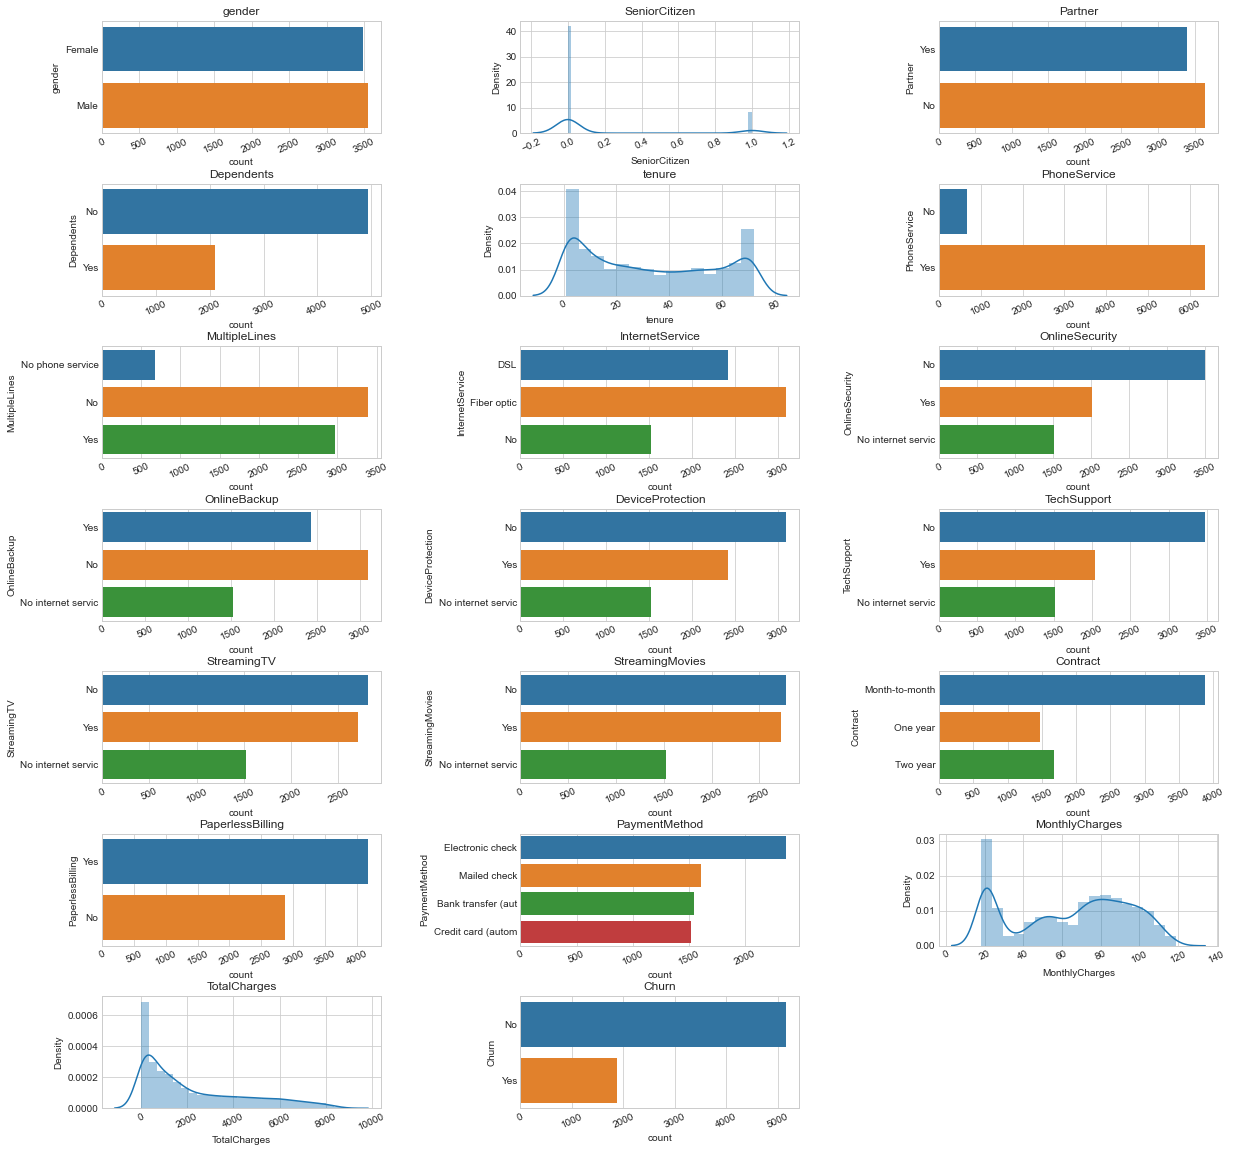

In [73]:
plot_distribution(df_filtered[columns_to_plot], cols=3, width=20, height=20, hspace=0.45, wspace=0.5)

## Question 1.1.3.3: 
Check out relationship between tenure and contract duration

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

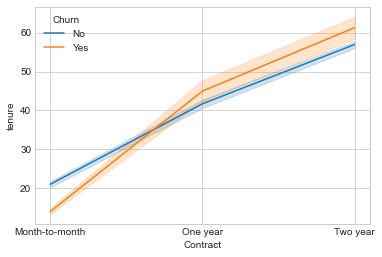

In [74]:
sns.lineplot(x="Contract", y="tenure", hue = "Churn", data=df_filtered)

Comment: It seems that a longer contract duration implies longer tenure, but also churn is more likely than with a lesser contract duration.

## Question 1.1.3.4: Looking at correlation of churn and other variables

In [75]:
from sklearn.feature_selection import mutual_info_classif

**Using:** `mutual_info_classif`

In [76]:
total_features = ['tenure', 'MonthlyCharges', 'TotalCharges']
for item in encoded_features:
    total_features.append(item)

In [77]:
# standardise the data!! 
X = StandardScaler().fit_transform(df2[total_features])
y = df2.Churn.values

In [78]:
check = mutual_info_classif(X, y, discrete_features=True)
len(check)

46

In [79]:
index_max = np.argmax(check)
index_min = np.argmin(check)

In [80]:
correlation = []
for i in range(len(check)):
    correlation.append([total_features[i],check[i]])

In [81]:
correlation[index_max]

['TotalCharges', 0.5375301544308857]

In [82]:
correlation[index_min]

['gender_encoded_0', 3.6504338027820715e-05]

In [83]:
def sort_list(nested_list):
    # key is set to sort using second element of 
    # sublist lambda has been used
    nested_list.sort(key = lambda x: x[1], reverse=True)
    return nested_list

In [84]:
sort_list(correlation)

[['TotalCharges', 0.5375301544308857],
 ['MonthlyCharges', 0.17383458326575218],
 ['Contract_encoded_0', 0.09165708535825622],
 ['tenure', 0.07895028043866212],
 ['OnlineSecurity_encoded_0', 0.06126036373285575],
 ['Contract_encoded_2', 0.060289026967292145],
 ['TechSupport_encoded_0', 0.05914133928184402],
 ['InternetService_encoded_1', 0.047645961231676304],
 ['PaymentMethod_encoded_2', 0.04379964028559974],
 ['OnlineBackup_encoded_0', 0.03589122514716067],
 ['DeviceProtection_encoded_0', 0.03180496977132366],
 ['InternetService_encoded_2', 0.03127431929413758],
 ['OnlineSecurity_encoded_1', 0.03127431929413758],
 ['OnlineBackup_encoded_1', 0.03127431929413758],
 ['DeviceProtection_encoded_1', 0.03127431929413758],
 ['TechSupport_encoded_1', 0.03127431929413758],
 ['StreamingTV_encoded_1', 0.03127431929413758],
 ['StreamingMovies_encoded_1', 0.03127431929413758],
 ['PaperlessBilling_encoded_0', 0.019119265234473853],
 ['PaperlessBilling_encoded_1', 0.019119265234473853],
 ['Contract_

`mutual_info_classif` returns "a non-negative value, which measures the dependency between the variables. It is equal to zero if and only if two random variables are independent, and higher values mean higher dependency" - see https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html

Looks like on this correlation measure:
- Total Charges, Monthly Charges, lower contract time and tenure have the highest correlation to churn
- Gender, phone service and multiple lines have low correlation to churn

## Question 1.1.3.5: plots to look at churn vs tenure, contract, age, monthly and total charges

Many different plots

<AxesSubplot:xlabel='Churn', ylabel='tenure'>

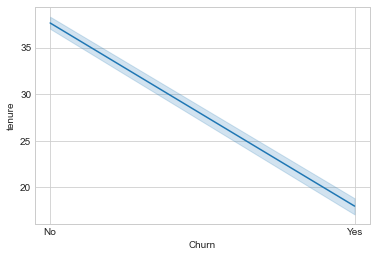

In [85]:
sns.lineplot(x="Churn", y="tenure", data=df_filtered)

<AxesSubplot:xlabel='Churn', ylabel='MonthlyCharges'>

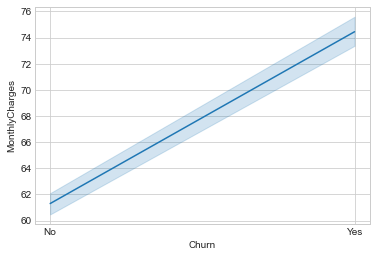

In [86]:
sns.lineplot(x="Churn", y="MonthlyCharges", data=df_filtered)

<AxesSubplot:xlabel='Churn', ylabel='TotalCharges'>

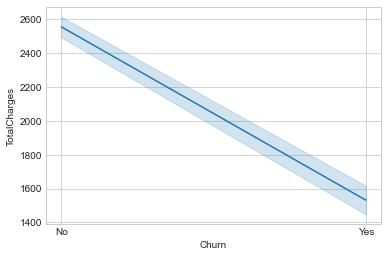

In [87]:
sns.lineplot(x="Churn", y="TotalCharges", data=df_filtered)

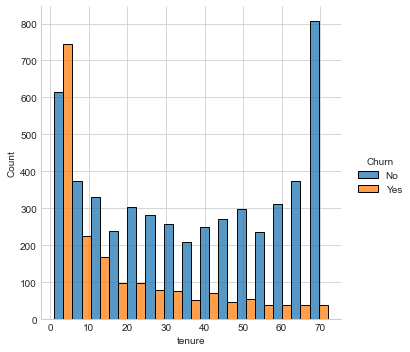

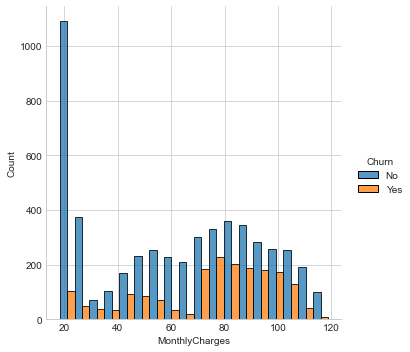

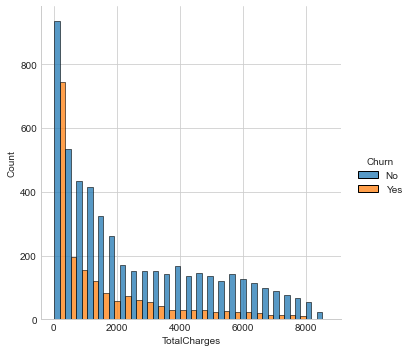

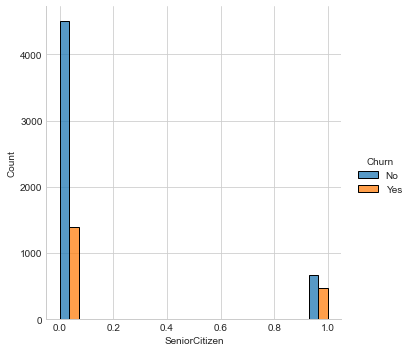

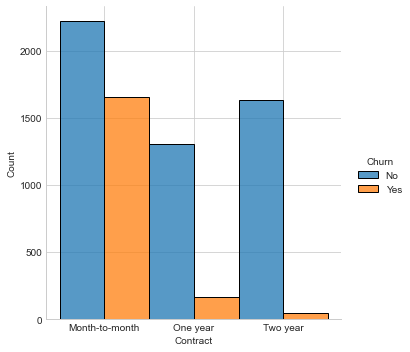

In [88]:
cols_to_plot = ['tenure', 'MonthlyCharges', 'TotalCharges', 'SeniorCitizen', 'Contract']
for column in cols_to_plot:
    sns.displot(df_filtered, x=column, hue="Churn", multiple="dodge")

<AxesSubplot:xlabel='Contract', ylabel='tenure'>

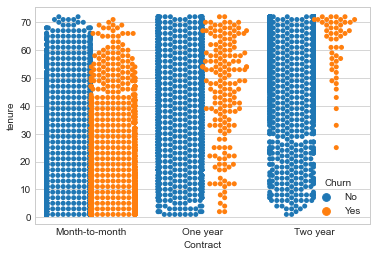

In [89]:
sns.swarmplot(x="Contract", y="tenure", data=df_filtered, hue = "Churn", dodge=True)

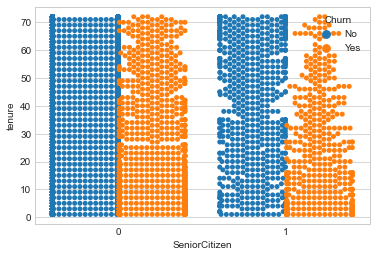

In [90]:
ax = sns.swarmplot(x='SeniorCitizen', y = "tenure", hue = "Churn", data=df_filtered, dodge=True)

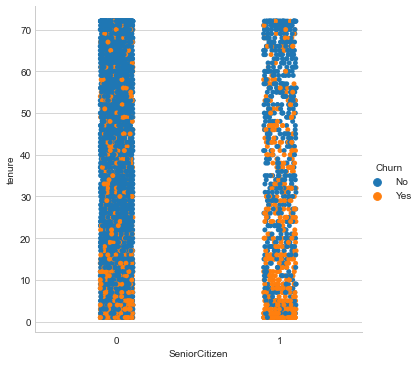

In [91]:
sns.catplot(x="SeniorCitizen", y="tenure", hue = "Churn", data=df_filtered)

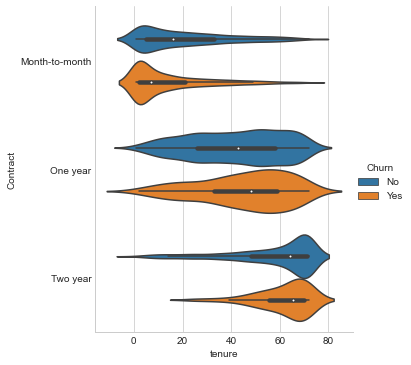

In [96]:
sns.catplot(x="tenure", y='Contract', hue="Churn",
            kind="violin", data=df_filtered)

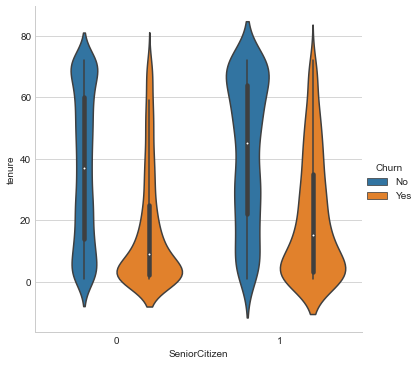

In [97]:
sns.catplot(x="SeniorCitizen", y='tenure', hue="Churn",
            kind="violin", data=df_filtered)

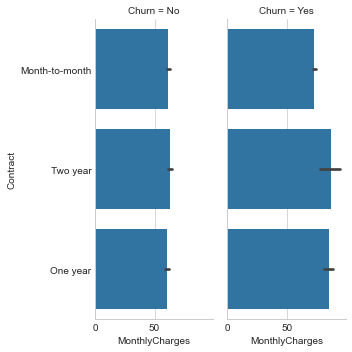

In [98]:
g = sns.FacetGrid(df_filtered, col="Churn", height=5, aspect=.5)
g.map(sns.barplot, 'MonthlyCharges', 'Contract')

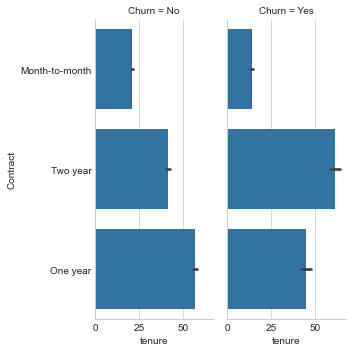

In [99]:
g = sns.FacetGrid(df_filtered, col="Churn", height=5, aspect=.5)
g.map(sns.barplot, 'tenure', "Contract")

## Question 1.1.3.6: Using models to identify feature importance

In [100]:
rf_est = RandomForestClassifier()
lr_est = LogisticRegression(penalty='l1', solver='liblinear') # make sure l1 norm (see docs)

### First kind: Random Forest classifier

In [101]:
# standardise the data
X = StandardScaler().fit_transform(df2[total_features])
y = df2.Churn.values

# split this up into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

rf_est.fit(X_train, y_train)
print(rf_est.score(X_test, y_test))

0.7838452787258248


In [102]:
importances = rf_est.feature_importances_

In [103]:
forest_importances = pd.Series(importances, index=total_features)
forest_importances.sort_values(ascending=False);

In [106]:
categorical_variables = columns_to_dummy.copy()

def find_cat_for_param(param):
    cat_candidates = [cat for cat in categorical_variables if param.startswith(cat)]
    return cat_candidates[0] if len(cat_candidates) > 0 else None
    
def category_roll_up(consolidated_variables, param, importance):
    cat_for_param = find_cat_for_param(param)
    consolidated_key = cat_for_param or param
    if consolidated_key not in consolidated_variables:
        consolidated_variables[consolidated_key] = importance
    else:
        consolidated_variables[consolidated_key] += importance
    return consolidated_variables

rolled_up_features = {}

for param, importance in forest_importances.to_dict().items():
    rolled_up_features = category_roll_up(rolled_up_features, param, importance)

sorted_features = { 
    k: v for k, v in sorted(
        rolled_up_features.items(), key=lambda item: item[1], reverse=True
    ) 
}
    
sorted_features

{'TotalCharges': 0.16340606373680594,
 'MonthlyCharges': 0.1367173267579365,
 'tenure': 0.13316801838313613,
 'Contract': 0.08140283642430671,
 'PaymentMethod': 0.06444810848548968,
 'TechSupport': 0.04448742260723396,
 'OnlineSecurity': 0.04321268787656095,
 'InternetService': 0.043013067196905314,
 'gender': 0.035517450927817225,
 'OnlineBackup': 0.031246049395619136,
 'StreamingTV': 0.029957110018621336,
 'PaperlessBilling': 0.029644315718216428,
 'MultipleLines': 0.02869369039128615,
 'Partner': 0.027604938538166125,
 'DeviceProtection': 0.02704764531468533,
 'SeniorCitizen': 0.02573839891567774,
 'StreamingMovies': 0.02507626331001682,
 'Dependents': 0.023767316041925526,
 'PhoneService': 0.005851289959592897}

### Comment:

The top features in the correlation test were Total Charges, Monthly Charges, low contract length and tenure. Here the same things are the most important, with Contract length collecetd into one variable for convenience. Phone service is again very low in importance, as in correlation.

### Logistic Regression

In [107]:
lr_est.fit(X_train, y_train)
print(lr_est.score(X_test, y_test))

0.7901023890784983


In [108]:
coeffs = lr_est.coef_
coeffs = coeffs.tolist()
len(coeffs[0])

46

In [109]:
coeffs_list = []
for num in range(len(coeffs[0])):
    coeffs_list.append(coeffs[0][num])

In [110]:
logistic_importances = pd.Series(coeffs_list, index=total_features)
logistic_importances.sort_values(ascending=False)

TotalCharges                  0.747100
Contract_encoded_0            0.389132
InternetService_encoded_1     0.296696
OnlineSecurity_encoded_0      0.215171
TechSupport_encoded_0         0.190676
PaymentMethod_encoded_2       0.134849
StreamingMovies_encoded_2     0.117995
StreamingTV_encoded_2         0.096094
SeniorCitizen_encoded_1       0.080615
OnlineBackup_encoded_0        0.064244
PaperlessBilling_encoded_1    0.051415
Dependents_encoded_0          0.045101
PhoneService_encoded_0        0.039029
MultipleLines_encoded_1       0.022795
Partner_encoded_1             0.013053
PaymentMethod_encoded_0       0.009348
DeviceProtection_encoded_2    0.000326
gender_encoded_0              0.000011
TechSupport_encoded_1         0.000000
MonthlyCharges                0.000000
MultipleLines_encoded_2       0.000000
Contract_encoded_1            0.000000
InternetService_encoded_2     0.000000
StreamingMovies_encoded_1     0.000000
TechSupport_encoded_2         0.000000
OnlineSecurity_encoded_2 

In [111]:
categorical_variables = columns_to_dummy.copy()

def find_cat_for_param(param):
    cat_candidates = [cat for cat in categorical_variables if param.startswith(cat)]
    return cat_candidates[0] if len(cat_candidates) > 0 else None
    
def category_roll_up(consolidated_variables, param, importance):
    cat_for_param = find_cat_for_param(param)
    consolidated_key = cat_for_param or param
    if consolidated_key not in consolidated_variables:
        consolidated_variables[consolidated_key] = importance
    else:
        consolidated_variables[consolidated_key] += importance
    return consolidated_variables

rolled_up_features = {}

for param, importance in logistic_importances.to_dict().items():
    rolled_up_features = category_roll_up(rolled_up_features, param, importance)

sorted_features = { 
    k: v for k, v in sorted(
        rolled_up_features.items(), key=lambda item: item[1], reverse=True
    ) 
}
    
sorted_features

{'TotalCharges': 0.7471004674381954,
 'OnlineSecurity': 0.21517088961699696,
 'InternetService': 0.1949209617950423,
 'TechSupport': 0.19067582686780749,
 'Contract': 0.14656718531916546,
 'StreamingMovies': 0.1179951745761807,
 'StreamingTV': 0.09609370466451991,
 'PaymentMethod': 0.08332311115123422,
 'SeniorCitizen': 0.07089384396819406,
 'OnlineBackup': 0.06424439788179262,
 'DeviceProtection': 0.00032567891744352407,
 'MonthlyCharges': 0.0,
 'PaperlessBilling': -0.011404619922011867,
 'gender': -0.014151971055908631,
 'Dependents': -0.018302253162242536,
 'Partner': -0.019114606457292335,
 'PhoneService': -0.020745758776193647,
 'MultipleLines': -0.070598320067822,
 'tenure': -1.5003341931133964}

## Comment:

The most important features so far under correlation and Random Forest have been Total Charges, Monthly Charges, contract length and tenure. Here again, Total charges is the most important, but Monthly charges here has no effect - in direct contrast with the other two feature importance checks. Tenure is still very important but obviously comes up in a negative direction.  